In [ ]:
!pip install matplotlib

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.sankey import Sankey

###Import dataset

In [ ]:
data = pd.read_csv("/content/salesdata.csv")

In [ ]:
# Display the first few rows of the DataFrame
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [ ]:
data.shape

(198917, 14)

In [ ]:
# Get summary statistics
data.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [ ]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [ ]:
data.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [ ]:
# Convert NaN to string for visualization
data['SoldFlag'] = data['SoldFlag'].apply(lambda x: 'NA' if pd.isna(x) else str(int(x)))

In [ ]:
sold_flag_counts = data['SoldFlag'].value_counts(dropna=False)
sold_flag_counts

NA    122921
0      63000
1      12996
Name: SoldFlag, dtype: int64

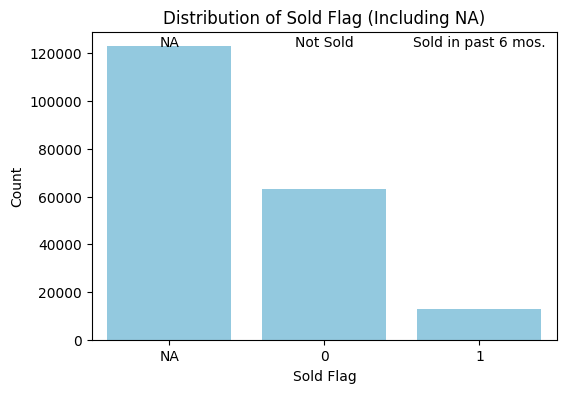

In [ ]:
plt.figure(figsize=(6, 4))  #figure with a width and height
sns.barplot(x=sold_flag_counts.index, y=sold_flag_counts, color='skyblue')
plt.xlabel('Sold Flag')
plt.ylabel('Count')
plt.title('Distribution of Sold Flag (Including NA)')


# Calculate the position for text labels
label_position = sold_flag_counts.max() + 10

# Annotate the meaning of the values
plt.text(0, label_position,'NA', ha='center')
plt.text(1, label_position,'Not Sold', ha='center')
plt.text(2, label_position,'Sold in past 6 mos.', ha='center')

plt.xticks(ticks=[0, 1, 2], labels=['NA', '0', '1'])
plt.show()


<Figure size 1000x600 with 0 Axes>

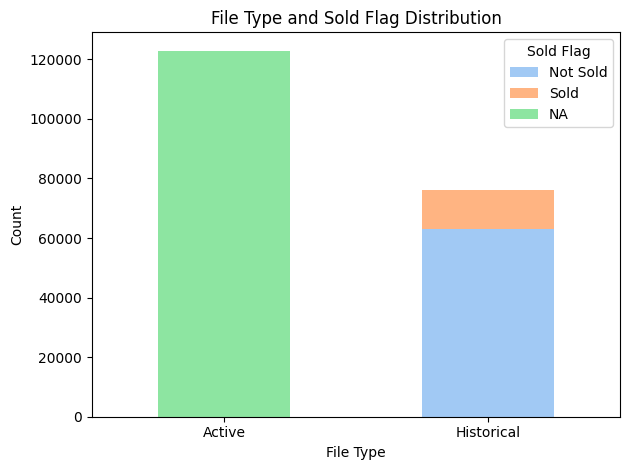

In [ ]:
# Grouped Bar Plot for File_Type and SoldFlag, including 'NA'
file_sold_count = data.groupby(['File_Type', 'SoldFlag']).size().unstack(fill_value=0)

# Customizing the appearance of the plot
sns.set_palette("pastel")  # Set a pleasing color palette
plt.figure(figsize=(10, 6))  # Set the figure size
ax = file_sold_count.plot(kind='bar', stacked=True)

plt.xlabel('File Type')
plt.ylabel('Count')
plt.title('File Type and Sold Flag Distribution')
plt.xticks(rotation=0)
plt.legend(title='Sold Flag', labels=['Not Sold', 'Sold', 'NA'])
plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
#Check unique categories/values in ReleaseYear column
unique_release_years = data['ReleaseYear'].unique()
print(unique_release_years)

[2015 2005 2013 2006 2010 2011 2008 2004 1994 2007 2001 2012 2009 1979
 1988 2003 2000 1997 1992 2002 1998 1995 1991 1999 1996 1990 1993 1980
 2014 1978 1981 1973 1965 1983 1986 1982 1989 1975 1976 1987 1984 1962
 1977 2016 1969 1974 1985 1966 1972 1956 1959 1967 1954 1970 1971 1952
 1968 1950 1963 1955 1935 1953 1964 1961 1960 2017 1958 1945 2018 1900
 1951 1905 1957 1941 1948 1946 1904 1927 1949 1931 1914 1922    0 1932
 1923]


In [ ]:
#Fill missing values in ReleaseYear column with the most frequently used value (mode)
most_common_release_year = data['ReleaseYear'].mode()[0]
data['ReleaseYear'] = data['ReleaseYear'].replace(0, most_common_release_year)

In [ ]:
print(data['ReleaseYear'].unique())

[2015 2005 2013 2006 2010 2011 2008 2004 1994 2007 2001 2012 2009 1979
 1988 2003 2000 1997 1992 2002 1998 1995 1991 1999 1996 1990 1993 1980
 2014 1978 1981 1973 1965 1983 1986 1982 1989 1975 1976 1987 1984 1962
 1977 2016 1969 1974 1985 1966 1972 1956 1959 1967 1954 1970 1971 1952
 1968 1950 1963 1955 1935 1953 1964 1961 1960 2017 1958 1945 2018 1900
 1951 1905 1957 1941 1948 1946 1904 1927 1949 1931 1914 1922 1932 1923]


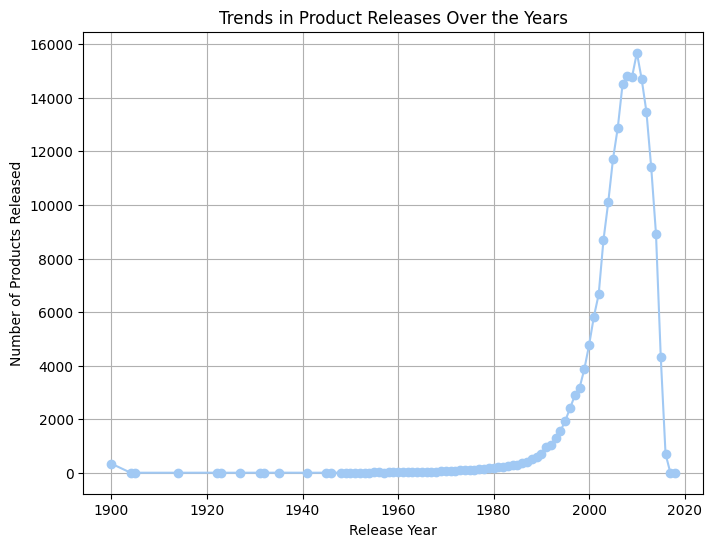

In [ ]:
# Group data by ReleaseYear and count the number of products released in each year
release_year_counts = data['ReleaseYear'].value_counts().sort_index()

# Create a line plot to visualize trends in product releases over the years
plt.figure(figsize=(8,6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Products Released')
plt.title('Trends in Product Releases Over the Years')
plt.grid(True)
plt.show()

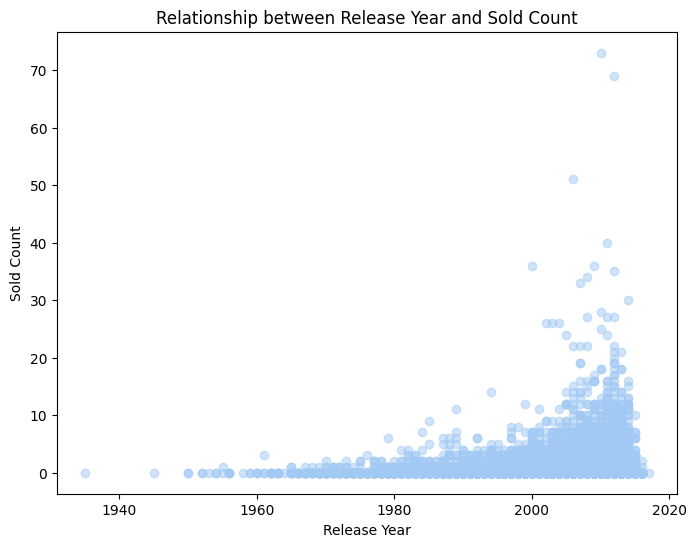

In [ ]:
#Scatter plot to visualize the relationship between 'ReleaseYear' and 'SoldCount'
plt.figure(figsize=(8,6))
plt.scatter(data['ReleaseYear'], data['SoldCount'], alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Sold Count')
plt.title('Relationship between Release Year and Sold Count')
plt.show()


In [ ]:
#Correlation analysis between 'ReleaseYear' and 'SoldCount'
correlation = data['ReleaseYear'].corr(data['SoldCount'])
print(f"Correlation between ReleaseYear and SoldCount: {correlation:.2f}")

Correlation between ReleaseYear and SoldCount: 0.07


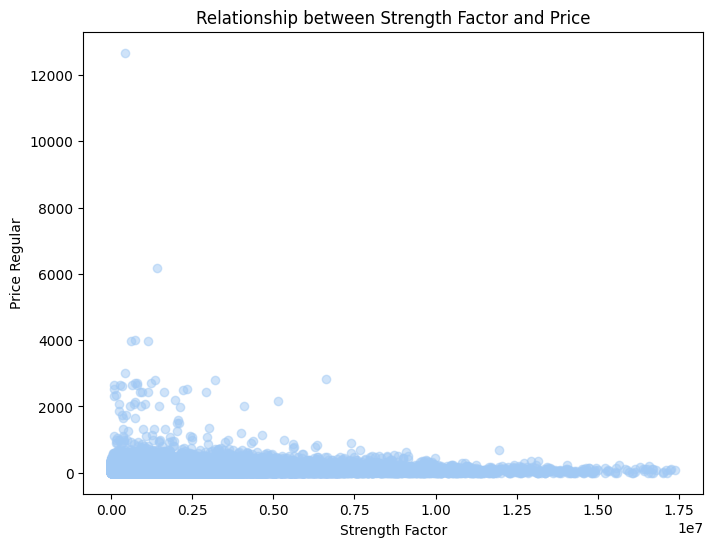

In [ ]:
#Scatter plot to visualize the relationship between 'StrengthFactor' and 'PriceReg'
plt.figure(figsize=(8, 6))
plt.scatter(data['StrengthFactor'], data['PriceReg'], alpha=0.5)
plt.xlabel('Strength Factor')
plt.ylabel('Price Regular')
plt.title('Relationship between Strength Factor and Price')
plt.show()

In [ ]:
correlation = data['StrengthFactor'].corr(data['PriceReg'])
print(f"Correlation between StrengthFactor and PriceReg: {correlation:.2f}")

Correlation between StrengthFactor and PriceReg: 0.03


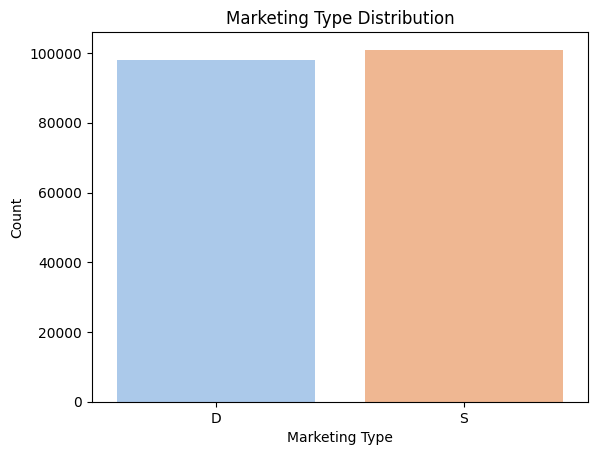

In [ ]:
# Bar Plot for MarketingType
sns.countplot(data=data, x='MarketingType')
plt.xlabel('Marketing Type')
plt.ylabel('Count')
plt.title('Marketing Type Distribution')
plt.show()


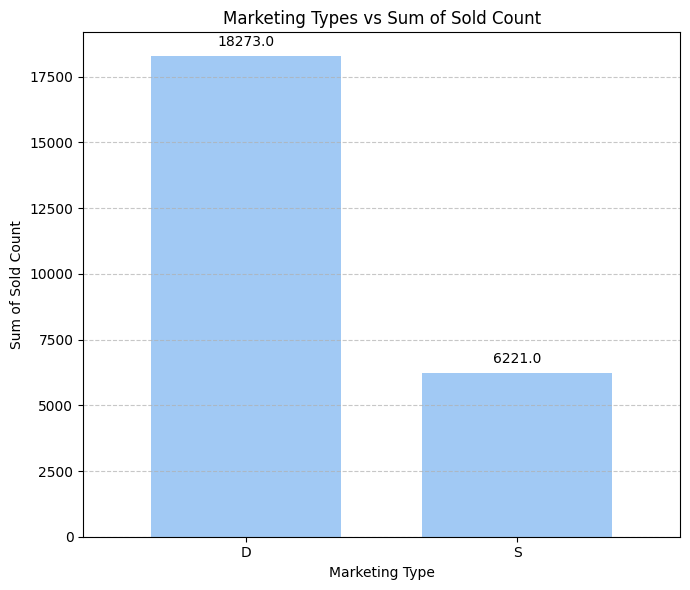

In [ ]:
# Filter out rows with 'NA' values in SoldCount
filtered_data = data.dropna(subset=['SoldCount'])

# Group data by MarketingType and sum the SoldCount for each type
marketing_type_sold_sum = filtered_data.groupby('MarketingType')['SoldCount'].sum()

# Set the color palette
sns.set_palette("pastel")

# Create a bar plot with enhanced aesthetics
plt.figure(figsize=(7, 6))
ax = marketing_type_sold_sum.plot(kind='bar', width=0.7)
plt.xlabel('Marketing Type')
plt.ylabel('Sum of Sold Count')
plt.title('Marketing Types vs Sum of Sold Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

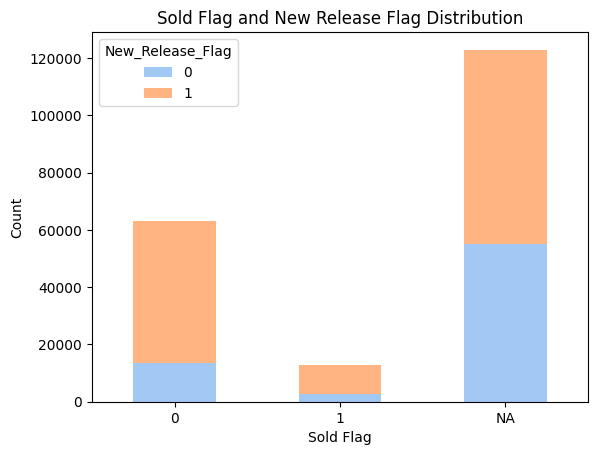

In [ ]:
# Stacked Bar Plot for SoldFlag and New_Release_Flag
sold_new_count = data.groupby(['SoldFlag', 'New_Release_Flag']).size().unstack()
sold_new_count.plot(kind='bar', stacked=True)
plt.xlabel('Sold Flag')
plt.ylabel('Count')
plt.title('Sold Flag and New Release Flag Distribution')
plt.xticks(rotation=0)
plt.show()